In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

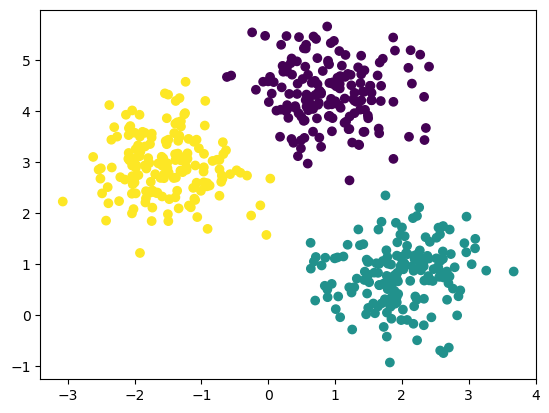

In [39]:
# 1. 生成数据
# 设置生成三类数据点，均值不同，方差相似
n_samples = 500
X, y_true = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true)

In [41]:
# 2. 拟合高斯混合模型
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X)
y_gmm = gmm.predict(X)
y_gmm

G:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0,

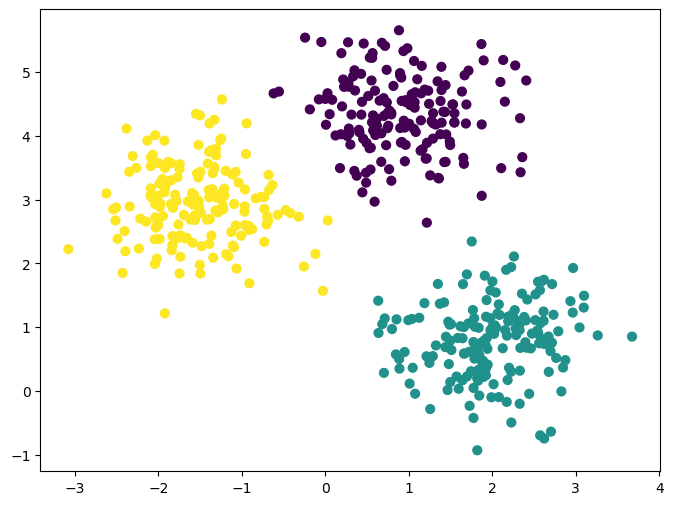

In [42]:
# 3. 可视化聚类结果
plt.figure(figsize=(8, 6))

# 绘制数据点，根据 GMM 聚类结果进行着色
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=40, cmap='viridis', marker='o', label="Data")

In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_gmm)
accuracy

1.0

In [44]:
# 绘制 GMM 中的每个高斯分布的均值和协方差椭圆
def plot_ellipse(position, covariance, ax=None, **kwargs):
    """绘制高斯分布的协方差椭圆"""
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):  # nsig 表示椭圆的尺度
        ellipse = plt.matplotlib.patches.Ellipse(
            position, nsig * width, nsig * height,
            angle=angle, **kwargs
        )
        ax.add_patch(ellipse)

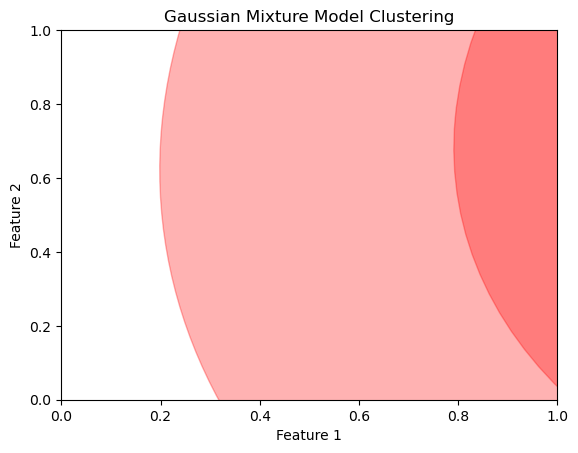

In [45]:
# 绘制每个高斯成分的椭圆
for i in range(3):
    plot_ellipse(gmm.means_[i], gmm.covariances_[i], alpha=0.3, color='red')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Gaussian Mixture Model Clustering")
plt.show()
